# Pandas 

##
1차원 series _ 동질적 데이터 
2차원 dataframe _ 여러개의 series 가 모여 df 생성 
3차원 panel 

# pandas # 
=> ndarray(배열) + dict(검색)
dict - data고속 처리가능 but 중복 불가

단점 보완한 것이 pandas_ 고속처리가능
numpy 식 indexing 가능


# 판다스 기능 3가지 #

## 1.index## 
key에 의한 indexing 가능 ( 숫자가 아니여도 된다 !)
=> loc_ key , lioc_숫자 key,숫자 종류에따라 사용 함수가 상이

행 인덱스 : index
열 인덱스  : columns
값 : values

## 2.전처리 ##
1.결측치처리 isna
2.이상치처리 box
-3사분위 - 1사분위 = IQR
-1.5 X IQR = 상한치 하한치 결정
3.범주화 categorical _ 정성적데이터를 범주화
-정량적,정성적
scikit에서 제공하는게 더 유리 
4.정규화 방법 hyper parameter 사람이 결정해야할 변수 not computer
1)min max 정규화 : data- min / max-min -> 모든 데이터가 0-1사이로 정규화 
2)Z점수 정규화 : DATA - 평균 / 표준편차 -> 표준정규분포의 확률값을 구할 수 있다.
  표준정규분포(평균기준) 
  표준편차의 1배한 범위에 68%
  표준편차의 2배한 범위에 95%
  표준편차의 3배한 범위에 99%
  평균 (+-) 2X표준오차(95%)
-Z점수 문제점 : 수의 범위가 넓게나와 X축과 만나지않는다 . 이상치가 나올 수 있음
3)ROBUST 정규화 : DATA - 평균이 아닌 다른값/ 표준편차 
4)NORMALIZATION :숫자를 정규화할 때 방향값을 중시하는 정규화 방법 
-데이터 크기를 구한 후 모든 요소를 나눠주면 1 = 이것이 의미하는 것이 방향값
5)시각화 
-scikit에서 제공하는게 더 유리 

## 3.데이터 요약기능#

1)요약기능
group by 
pivot
pivot table
cross tab

2)file 관리
데이터 타입변환

In [1]:
import pandas as pd
data = {'a':0., 'b':1.,'c':2.} #dict 초기화
s = pd.Series(data) #1차원 
print(s['a'])
s = pd.Series(data,index=['b','c','d','a']) #행이름
print(s['a'])
print(s['d'])
list(s)

0.0
0.0
nan


[1.0, 2.0, nan, 0.0]

In [132]:
s = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])  #리스트로 놓고  인덱스 주기  _ 순서보장 => 1은 a 2는 b
print('인덱스에 의한 출력',s[0])  #순서에의한 인덱스 
print(s['a'])
print(s[:3]) #numpy 방식 
print('음수',s[-3:])
s['a'] = 100  #인덱스에 값을 넣어주면  값 업데이트 가능
print(s['a'])
s['f']=10
print(s['f'])
print("filtering에 의한 출력", s[s>4]) #인덱스가 boolean 으로 바뀐다 
print(s)
print(s*2)

인덱스에 의한 출력 1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력 a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [133]:
print(s)

a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64


In [10]:
import numpy as np
data = np.array(['a','b','c','d'])  #ndarray
#range => list 출력
#arange => ndarray 출력
#Rangeindex 객체는 index로 출력

#인덱스 설정안하면 names 인덱스 객체 자동 생성
s = pd.Series(data) #ndarray를 이용해 시리즈 초기화 
print('시리즈 데이터',s.values) #값만

print('시리즈 인덱스',s.index)  #RangeIndex(start=0, stop=4, step=1)

print('시리즈 초기화',s)

print('시리즈 인덱스의 값',s.index.values)

print(s[0])
print(s.head())  #tail() _뒤에서 부터 
print(s.value_counts()) #도수분포표 _ 종류별 개수 세기 
print(s.value_counts(normalize = True))  #notmalize 는 전체를 1로 만들어라  => 상대도수분포표
print(s.describe()) #숫자변수 
#↓↓↓↓↓↓
#count     4 전체 갯수
#unique    4 범주
#top  d? ???
#freq      1 도수가 1개씩
#dtype : object _> 객체이면서 문자인경우 

print('차원', s.ndim)
print('차수', s.shape)

시리즈 데이터 ['a' 'b' 'c' 'd']
시리즈 인덱스 RangeIndex(start=0, stop=4, step=1)
시리즈 초기화 0    a
1    b
2    c
3    d
dtype: object
시리즈 인덱스의 값 [0 1 2 3]
a
0    a
1    b
2    c
3    d
dtype: object
d    1
b    1
c    1
a    1
dtype: int64
d    0.25
b    0.25
c    0.25
a    0.25
dtype: float64
count     4
unique    4
top       d
freq      1
dtype: object
차원 1
차수 (4,)


In [11]:
#dict
sdata = {'Ohio':35000,'Texas':71000 , 'Oregon': 16000, 'Utah':5000} #dict 초기화 
obj3 = pd.Series(sdata)
print(obj3)
print(obj3.shape) #4개 

states= ['California','Ohio','Oregon','Texas'] #캘리포니아는 ;NaN _위에 데이터가 없음
obj4 = pd.Series(sdata, index = states) 
print(obj4)
print('시리즈인덱스', obj3.index) #Index 
print('시리즈인덱스', obj4.index)#Index
print('null 이 있는가', pd.isnull(obj4)) #데이터가 null 인가  : null 일 때 True
print('결측치가 있는가',pd.notnull(obj4)) #Null 이 아닐 때 , 값이 있을 때  True
print('객체출력')
print('obj3출력', obj3)
print('obj4출력', obj4)
#연산 : 짝이 맞지않기 때문에
#pandas에서는 짝이 없어도 연산은 가능 -> Nan으로 출력
print('연산결과 출력', obj3+obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
시리즈인덱스 Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈인덱스 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')
null 이 있는가 California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치가 있는가 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
객체출력
obj3출력 Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4출력 California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
연산결과 출력 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [13]:
s = pd.Series(['A','B','Aaba','Baca',np.nan,'CABA','cat'])#시리즈는 문자열지원
s.str.count('a') #'a갯수세기'

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

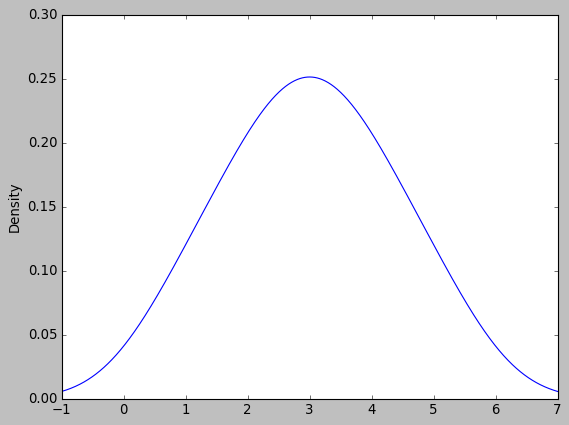

In [17]:
# 시리즈 float 함수 지원
import matplotlib.pyplot as plt
plt.style.use(['classic'])

s = pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() #kernel density estimate -곡선으로 출력  #데이터가 없는 부분은 kernel로 에측 _ kernel default : 가우시안 분포 
plt.show()

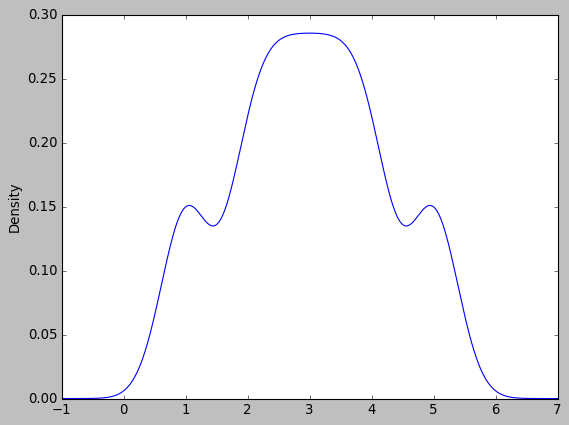

In [20]:
s.plot.kde(bw_method=0.3) #과적합 bin width

plt.show()

In [62]:
import pandas as pd

area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop}) #key가  열 index로 사용됨 / 개별 'key'가 행 index
data 


#시리즈는 행인덱스르 줘야하지만  데이터 프레임은  key값 이용



,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [63]:
data['area']  #같은거 위아래 ! 
data.area

# 객체 비교  isNone
data.area is data['area']


True

In [64]:
#객체에서 변수를 실시간 추가하는 것이 가능
#append

data['density'] = data['pop'] / data['area']  #인구밀도를 추가했음 
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [65]:
#인덱스 없이 값만 가져오기

data.values #ndarray => 얘네들은 넘파이의 함수들로 처리가능
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [66]:
data.T  #데이터 전치 

data.values[0] #행값  왜냐하면 values

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

# iloc  loc

In [67]:
#숫자 인덱스로 할 때 iloc
data.iloc[:3,:2]  #행과열로 입력 integer location 


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [68]:
#key로 할 때에는 loc

data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [71]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.00000000e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [69]:
data.iloc[0,2] =90

In [70]:
data['Florida' : 'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [47]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

df = pd.DataFrame(d)
print(df)
print('축',df.axes)
print('')
print('데이터 타입',df.dtypes)
print('')
print('데이터 타입',df.get_dtype_counts)
print('')
print('비었나', df.empty) #데이터가 비었나?
print('')
print('차원',df.ndim)
print('')
print("차수",df.shape)
print('')
print('사이즈',df.size) #총 데이터 갯수  8 x 3
print('')
print('값',df.values)
print('')
print(df.head(2))
print('')
print(df.tail(2))

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]

데이터 타입 Name       object
Age       float64
Rating    float64
dtype: object

데이터 타입 <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>

비었나 False

차원 2

차수 (8, 3)

사이즈 24

값 [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24

  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [49]:
pd.DataFrame(d)

,Name,Age,Rating
0,김하나,25.0,4.23
1,이하나,26.0,3.24
2,삼하나,25.0,3.98
3,사하나,23.0,2.56
4,오하나,30.0,3.20
5,육하나,29.0,4.60
6,칠하나,23.0,3.80
7,팔하나,NaN,NaN


In [50]:
print('합계',df.sum())
print(df.mean())
print(df.std())  #standard deviation 표준편차 

합계 Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object
Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64


In [52]:
print('합계 ', df.sum())  # 전체 데이터합 
print(df.mean()) #숫자에 대해서만 계산 적용
print(df.std())  #숫자에 대해서만 계산 적용
print(df.describe()) #숫자에 대해서만 계산 적용
print('오브젝트',df.describe(include=['object']))  #include : 기본 숫자적용에대하여 문자도 포함
print(df.describe(include= 'all')) #unique 

합계  Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object
Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64
             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
오브젝트        Name
count     8
unique    8
top     팔하나
freq      1
       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     팔하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [77]:

data={'state': ['경기', '강원', '서울', '충북', '인천'],
      'year':[2000,2001,2002,2001,2002],
      'pop':[1.5,1.7,3.6,2.4,2.9]}

frame2=pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                 index=['one', 'two', 'three', 'four', 'five']) 




       year state  pop debt
one    2000    경기  1.5  NaN
two    2001    강원  1.7  NaN
three  2002    서울  3.6  NaN
four   2001    충북  2.4  NaN
five   2002    인천  2.9  NaN


In [92]:
frame2

,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


# 문제 1

In [ ]:

1.state만 출력하시오
2.debt열을 추가하고 모든값을 16.5로 입력하시오
3.debt 를 pd.series([-1.2,-1.5,-1.7], index=['two','four','five']) 로수정하시오
4.파생변수 'estern'에 주소가 서울인가를 따져 서울은 True 아니면 false가 되도록

In [93]:
# 내 답

#1
print(frame2.state)

#2
frame2['debt'] = 16.5

#3 



one      경기
two      강원
three    서울
four     충북
five     인천
Name: state, dtype: object


# 정답1

In [96]:
# 쌤 답


#1 

print(frame2['state'])
print(frame2.state)

#2
frame2['debt'] = 16.5

print("적용 후 ",frame2)

#3 

val = pd.Series([-1.2,-1.5,-1.7], index=['two','four','five'])
frame2['debt'] = val
print("적용후 ", frame2)

#4

frame2['estern']= frame2.state='서울'
print(frame2.columns)
del frame2['estern'] # 삭제
print(frame2['year']['one'])  # 열이 먼저옴
print(frame2.loc['one','year'])

one      서울
two      서울
three    서울
four     서울
five     서울
Name: state, dtype: object
one      서울
two      서울
three    서울
four     서울
five     서울
Name: state, dtype: object
적용 후         year state  pop  debt estern
one    2000    서울  1.5  16.5     서울
two    2001    서울  1.7  16.5     서울
three  2002    서울  3.6  16.5     서울
four   2001    서울  2.4  16.5     서울
five   2002    서울  2.9  16.5     서울
적용후         year state  pop  debt estern
one    2000    서울  1.5   NaN     서울
two    2001    서울  1.7  -1.2     서울
three  2002    서울  3.6   NaN     서울
four   2001    서울  2.4  -1.5     서울
five   2002    서울  2.9  -1.7     서울
Index(['year', 'state', 'pop', 'debt', 'estern'], dtype='object')
2000
2000


# 시간함수

#시간함수
#리눅스 :timestamp 1970.1.1 이후로 경과된 mili초로 표현  
#판다스 내부적으로 데이터를 저장할떄에는 time stamp 로 저장
#pandas 에서는 nano 초까지 표현
#시간인덱스 : 시계열 분석 : DateTimeIndex , PeriodIndex 주기값 지원 

#python : time.time() : 2000.1.1부터 경과된 mili초로 표현 
#datetime(날짜와 시간 함께 표현)

In [98]:
import time
print(time.time())   #밀리초로 표현 
print(time.localtime()) #년월일 시분초로  변경 
yesterday = time.localtime(time.time()-60*60*24) #24시간 분초를 빼주면 하루 전   #시간 연산 가능 
yesterday 
print(yesterday)
time.strftime('%Y %m %d') #시간을 문자열로 변경해서 출력 

1578383537.3504612
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=52, tm_sec=17, tm_wday=1, tm_yday=7, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=52, tm_sec=17, tm_wday=0, tm_yday=6, tm_isdst=0)


'2020 01 07'

In [99]:
from datetime import date,time,datetime,timedelta   #delta는 시간차
now = datetime.now()  #년월일 시분초 출력
print(now)
now.year,now.month,now.day
now.timestamp() #밀리초로 표현 

2020-01-07 16:55:20.702940


1578383720.70294

In [105]:
#now(년월일시분초)를 문자열로
now_str=now.strftime('%Y-%m-%d  %H:%M:%S')

print(now_str)

2020-01-07  16:55:20


In [110]:
datetime.strptime(now_str,'%Y-%m-%d  %H:%M:%S')   #시간을 문자열로 바꿔줌 

datetime.datetime(2020, 1, 7, 16, 55, 20)

In [102]:
delta = datetime(2015,1,7)- datetime(2010,6,24,8,15)
print('시간차는=',delta,delta.days,delta.seconds)

시간차는= 1657 days, 15:45:00 1657 56700


In [112]:
delta = datetime(1994,2,10)- datetime(2020,1,7,17,5)
print('시간차는=',delta,delta.days,delta.seconds)

시간차는= -9463 days, 6:55:00 -9463 24900


In [116]:
start = datetime(2020,1,7,17,5)  #년월일시분
print(start+timedelta(12)) #기본이 날짜 

#다섯시간전으로
start + timedelta(hours =-5)

2020-01-19 17:05:00


datetime.datetime(2020, 1, 7, 12, 5)

In [118]:
import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp('2017-03-01'))
print(pd.Timestamp(1587687255,unit='s'))

2020-01-07 17:07:14.711254
2017-03-01 00:00:00
2020-04-24 00:14:15


In [119]:
#Date Time Index 생성 : 행 :Index  열 : columns
print(pd.date_range("11:00","13:30",freq = "30min")) #11시부터 1330까지 30분 단위로 : 6개 생성
print("시간으로",pd.date_range("11:00","13:30",freq ="30min").time)  #위결과에서 시간만 추출

print(pd.date_range("11:00","13:00",freq="H") ##11시부터 1330까지 1시간 단위로

DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')
시간으로 [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0) datetime.time(13, 30)]
DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [120]:
#Date Time Index _ 지정된 시간을 INDEX로 만듬 #todatetime


print(pd.to_datetime(pd.Series(['Jul 31 ,2009','2010-01-10',None])))

print(pd.to_datetime(pd.Series(['2005/11/23','2010.12.31',None])))



0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
0   2005-11-23
1   2010-12-31
2          NaT
dtype: datetime64[ns]


In [121]:

print(pd.date_range('1/1/2017',periods=5)) #period 5 : 5개를 만들어 내라  # default 주기 : 일 간격

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')


In [123]:
print(pd.date_range('1/1/2017',periods=5,freq ='M'))  #Month 단위로 5개

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


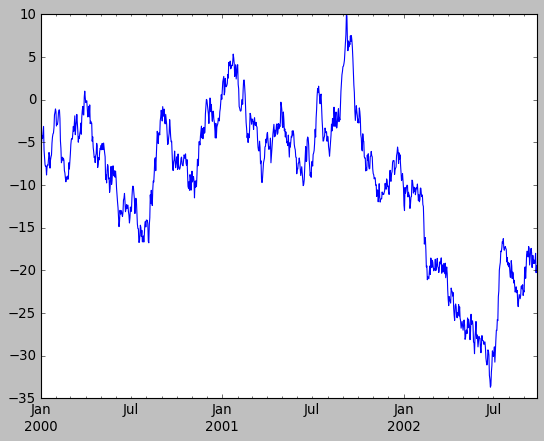

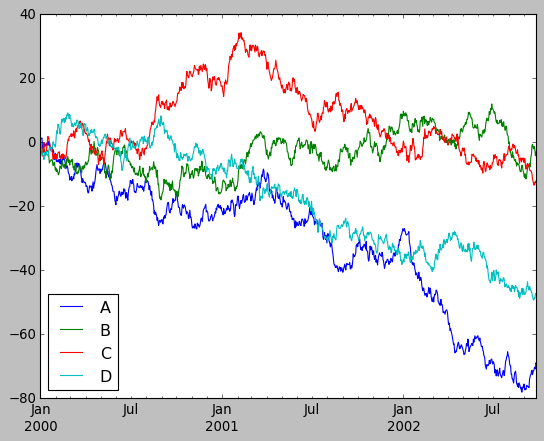

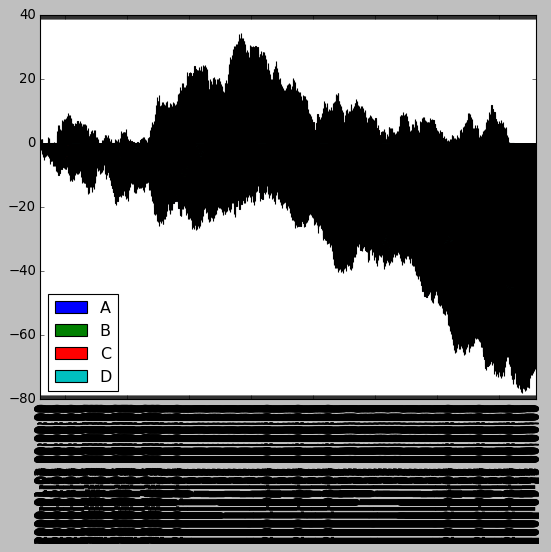

In [128]:
ts = pd.Series(np.random.randn(1000),#랜덤데이터 1000개
               index =pd.date_range('1/1/2000',periods=1000))   #periods=1000 ;1000일에 대하여 
ts = ts.cumsum()
ts.plot()

df=pd.DataFrame(np.random.randn(1000,4), index =ts.index, columns=list('ABCD'))

df=df.cumsum()
df.plot()
df.plot.bar();


# 문제 2

In [ ]:
#문제 다음 데이터를 데이터프레임에 저장하시요

#         지역  2018     2017   2016   2015   2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권  2466052 2431774 2456016 2473990    0.0141 


#문제 : '2015-2018' 증가율을 %로  변경하시오
#문제 : 2015 -2017의 증가율을 구해서 변수를 추가하시오
(열이름 : '2005-2015 '증가율)

In [139]:
roc = ['지역','2018','2017','2016''2015','2015-2018 증가율']
ind = ['서울','부산','인천','대구']


In [160]:
c ={'지역':['수도권','경상권','수도권','경상권'],
   '2018':[9904312,3448737,2890451,2466052],
   '2017':[9631482,3393191,2632035,2431774],
   '2016':[9762546,3512547,2517680,2456016],
    '2015':[9853972,3655437,2466338,2473990],
    '2015-2018 증가율':[0.0283,0.0163,0.0982,0.0141]}


df =pd.DataFrame(c,columns= ['지역','2018','2017','2016','2015','2015-2018 증가율'], index=['서울','부산','인천','대구'])

In [161]:
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [162]:
df['2015-2018 증가율'] =df['2015-2018 증가율'] * 100

In [163]:
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83
부산,경상권,3448737,3393191,3512547,3655437,1.63
인천,수도권,2890451,2632035,2517680,2466338,9.82
대구,경상권,2466052,2431774,2456016,2473990,1.41


In [164]:
df['2015-2017 증가율'] =(df['2017']-df['2015'])/df['2015']

In [165]:
df

,지역,2018,2017,2016,2015,2015-2018 증가율,2015-2017 증가율
서울,수도권,9904312,9631482,9762546,9853972,2.83,-0.022579
부산,경상권,3448737,3393191,3512547,3655437,1.63,-0.071741
인천,수도권,2890451,2632035,2517680,2466338,9.82,0.067183
대구,경상권,2466052,2431774,2456016,2473990,1.41,-0.017064
